# Montando o Google Drive e importando bibliotecas

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_white

# Importando o Dataframe

In [99]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preditiva/Bases/base_funcionarios_v3.csv')

In [100]:
df = df.drop('Unnamed: 0', axis=1)

In [101]:
df.head(3)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
0,5517.4,3,3,9.777079
1,6399.9,4,6,3.765998
2,6206.7,6,3,7.926264


# Análise Exploratória dos Dados

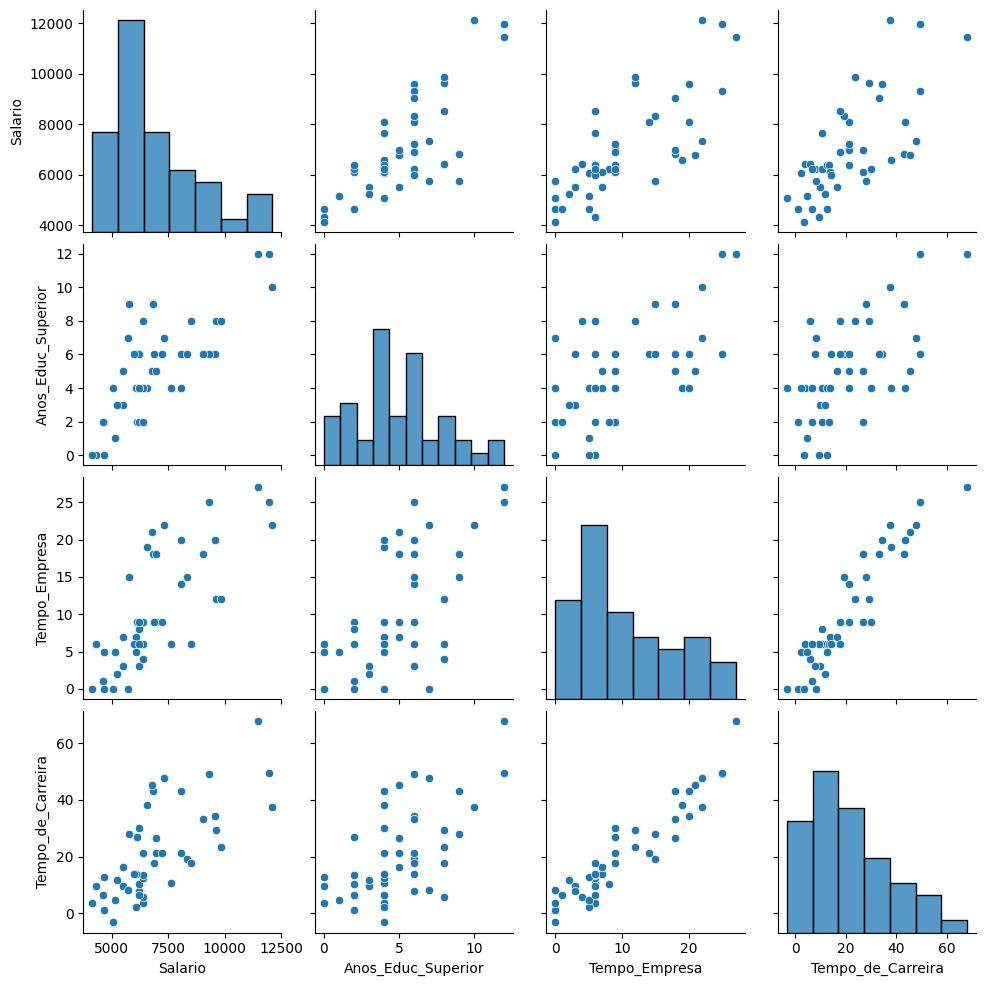

In [102]:
sns.pairplot(df)
plt.show()

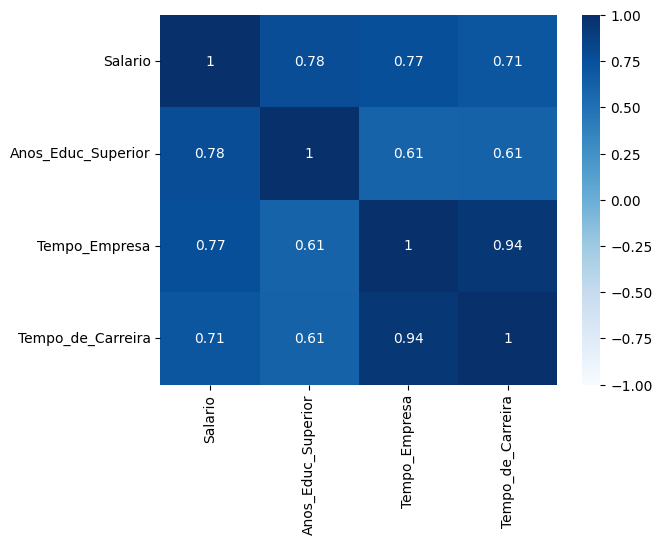

In [103]:
# Create the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix,
            cmap='Blues',
            vmin=-1, vmax=1,
            annot=True)  # Add annotations for coefficients
plt.show()

# Ajuste do Modelo de Regressão utilizando Statsmodels

In [104]:
# Output
y = df['Salario']

# Input
df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa', 'Tempo_de_Carreira']]

In [105]:
# Adjust the model and the the results
model = sm.OLS(y, x)
result = model.fit()

In [106]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.21e-12
Time:                        15:55:38   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4053.7618    308

**Equação do Modelo**

Salário = $\beta_0$ + $\beta_1$ x Anos Educação Superior + $\beta_2$ x Tempo Empresa

**Interpretando o Modelo**

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior e recém chegado na empresa é de `R$4.053,8`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa constante, gera um aumento médio de `R$347,71`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior constante, gera um aumento médio de `R$178,44`.<br>
**$\beta_3$** x Tempo de Carreira: O valor desse parâmetro, em um contexto lógico, não faz sentido. Após análise da matriz de correlação, podemos notar uma alta correlação com a variável Tempo de Empresa. O mais indicado é remover uma das variávels.


# Solucionando o problema de Multicolinearidade


In [107]:
# Removing 'Tempo de Carreira' from analysis and df
df2 = df.drop('Tempo_de_Carreira', axis=1)

y2 = df2['Salario']
x2 = df2[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa']]

In [108]:
# Adjust the model and the the results
model_2 = sm.OLS(y2, x2)
result_2 = model_2.fit()

In [109]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.66e-13
Time:                        15:55:39   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

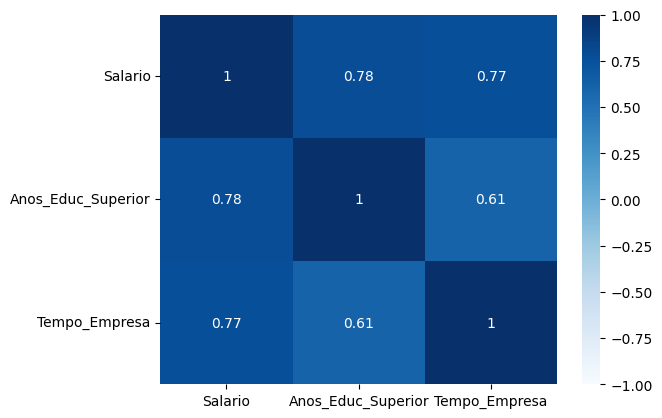

In [110]:
# Creating adjusted correlation matrix
df2corr = df2.drop('intercepto', axis=1)
correlation_matrix_adj = df2corr.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix_adj,
            cmap='Blues',
            vmin=-1, vmax=1,
            annot=True)
plt.show()

# Trabalhando com Variáveis Qualitativas

In [111]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preditiva/Bases/base_funcionarios_v4.csv')

In [112]:
df3.head(3)

,Unnamed: 0,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,0,5517.4,3,3,9.777079,Não
1,1,6399.9,4,6,3.765998,Não
2,2,6206.7,6,3,7.926264,Não


In [113]:
df3 = pd.get_dummies(df3, columns=['Possui_Skill_Dados'], drop_first=True)
df3 = df3.drop(['Unnamed: 0', 'Tempo_de_Carreira'], axis=1)

In [114]:
df3.head(3)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Possui_Skill_Dados_Sim
0,5517.4,3,3,0
1,6399.9,4,6,0
2,6206.7,6,3,0


In [115]:
# Inserting intercept column
df3['intercepto'] = 1

# Select the features (input variables) and target variable (response variable)
x3 = df3[['intercepto','Anos_Educ_Superior', 'Tempo_Empresa', 'Possui_Skill_Dados_Sim']]
y3 = df3['Salario']

In [116]:
# Adjust the model and the the results
model_3 = sm.OLS(y3, x3)
result_3 = model_3.fit()

In [117]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.90
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.87e-18
Time:                        15:55:39   Log-Likelihood:                -366.99
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      42   BIC:                             749.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4412

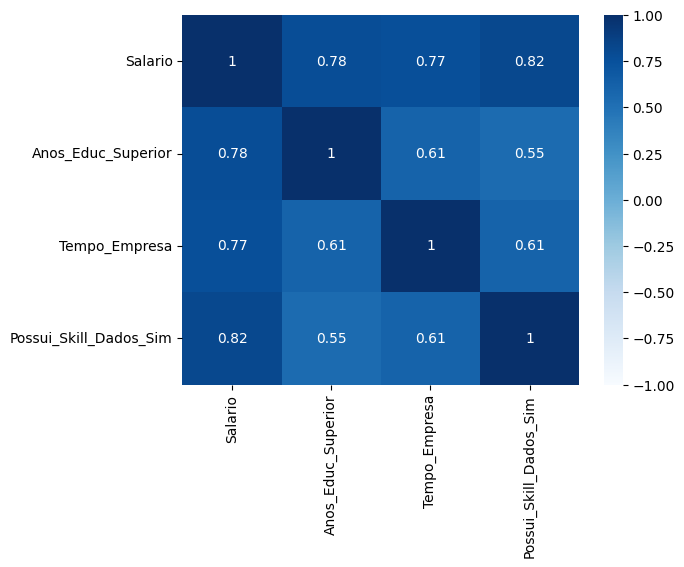

In [118]:
# Creating adjusted correlation matrix
df3corr = df3.drop(['intercepto'], axis=1)
correlation_matrix_3 = df3corr.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix_3,
            cmap='Blues',
            vmin=-1, vmax=1,
            annot=True)
plt.show()

# Diagnóstico do Modelo

## Normalidade dos Resíduos

In [119]:
# Definindo função que gera gráfico de resíduos de Pearson
def grafico_residuos(resultado):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())

    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1

    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1

    resid_graf.set(ylim=(ymin, ymax))

    ax1 = resid_graf.axes
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    plt.show()

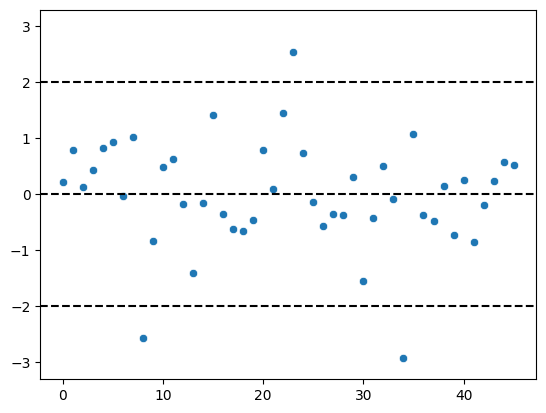

In [120]:
grafico_residuos(result_3)

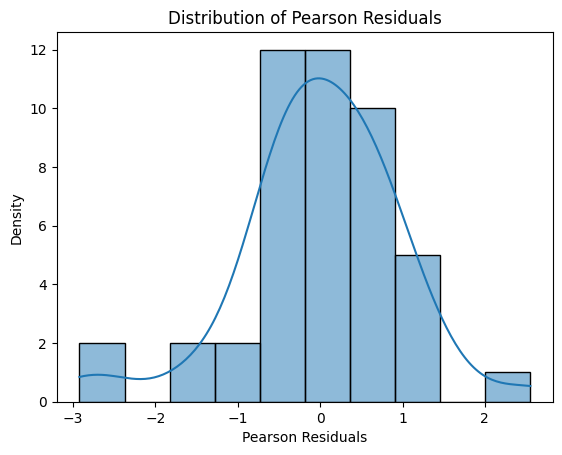

In [121]:
# Plotando distribuição dos resíduos
sns.histplot(result_3.resid_pearson, kde=True)

# Add labels (adjust as needed)
plt.xlabel('Pearson Residuals')
plt.ylabel('Density')
plt.title('Distribution of Pearson Residuals')
plt.show()

In [126]:
# Realização de Teste de Hipóteses para avaliar Normalidade
normalidade = shapiro(result_3.resid_pearson)
print('Statistics=%.3f, p-value=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Test statistics=0.951, p-value=0.054



**Inferência:**

O valor de p próximo de 0,05 não permite uma conclusão definitiva sobre a normalidade. Os dados podem ser considerados aproximadamente normais para fins práticos, mas há um leve indício de que se afastam da normalidade perfeita.

## Homocedasticidade dos Resíduos

In [123]:
# Estipulando os labels
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [124]:
# Realizando teste de white
white_test = het_white(result_3.resid_pearson,
                       result_3.model.exog)

In [125]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 11.715298949479546, 'LM-Test p-value': 0.1643657033597625, 'F-Statistic': 1.5803917193707129, 'F-Test p-value': 0.16425024727281234}


**Inferência:**

Com base no valor de p do Teste LM (0,164) e no valor de p do Teste F (0,164), não há evidência estatísticamente significativa para rejeitar a hipótese nula de homocedasticidade a um nível de significância comum de 0,05. Isso implica que a variância dos erros (resíduos) no modelo pode ser relativamente constante em todos os níveis das variáveis independentes.